# An analysis into usefulness of Levenshtein distance as a TCR distance metric

## Module imports and figure formatting

In [1]:
import pandas as pd
import numpy as np

#Pyrepseq imports
import pyrepseq as prs
import pyrepseq.plotting as rsp
import pyrepseq.distance as rsd
import pyrepseq.stats as rss

#Plotting imports
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.style 
import matplotlib as mpl 

In [2]:
#Set default plotting parameters
mpl.rcParams['figure.figsize'] = [4.0, 4.0] 
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=500 

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Data imports 

### Mira - specific set

In [32]:
mira = pd.read_csv('../data/mira/processed/peptide-detail-ci.csv')
mira = mira.drop_duplicates("TCR Nucleotide Sequence")
mira = prs.standardize_dataframe(mira
                                        , [None, None, None ,
                               "v_gene", "amino_acid", "j_gene",
                    
                                           "Amino Acids", None, None, None])

mira = mira.dropna(axis=0, subset = ["CDR3B"] ).reset_index().drop("index", axis=1)

#Ensure that there are enough sequences within each epitope so that we get some at distance 1
mira_filtered = mira.groupby(['Epitope']).filter(lambda x: len(x) > 200).reset_index().drop("index", axis=1)

/Users/james/miniconda3/lib/python3.10/site-packages/tidytcells/tcr/_main.py:110: UserWarning: Failed to standardise: "TCRBV27-01" for species HomoSapiens. Attempted fix "TRBV27-1" did not meet the standardised format requirements. Ignoring this gene name...
  warn(
/Users/james/miniconda3/lib/python3.10/site-packages/tidytcells/tcr/_main.py:110: UserWarning: Failed to standardise: "TCRBV30-01" for species HomoSapiens. Attempted fix "TRBV30-1" did not meet the standardised format requirements. Ignoring this gene name...
  warn(
/Users/james/miniconda3/lib/python3.10/site-packages/tidytcells/tcr/_main.py:110: UserWarning: Failed to standardise: "TCRBV12-X" for species HomoSapiens. Attempted fix "TRBV12-X" did not meet the standardised format requirements. Ignoring this gene name...
  warn(
/Users/james/miniconda3/lib/python3.10/site-packages/tidytcells/tcr/_main.py:110: UserWarning: Failed to standardise: "TCRBV06-X" for species HomoSapiens. Attempted fix "TRBV6-X" did not meet the stan

/Users/james/miniconda3/lib/python3.10/site-packages/tidytcells/tcr/_main.py:110: UserWarning: Failed to standardise: "TCRBJ02-X" for species HomoSapiens. Attempted fix "TRBJ2-X" did not meet the standardised format requirements. Ignoring this gene name...
  warn(


### Minervina - background set

In [27]:
back = pd.read_csv('../data/minervina/beta/W_F1_2019_beta.txt.gz',sep='\t',index_col=0)
back = back.drop_duplicates("nSeqCDR3")
back = prs.standardize_dataframe(back
                                        , [None, None, None ,
                               "bestVGene", "aaSeqCDR3", "bestJGene",
                    
                                           None, None, None, None])

back = back.dropna(axis=0, subset = ["CDR3B"] ).reset_index().drop("index", axis=1)

/Users/james/miniconda3/lib/python3.10/site-packages/tidytcells/tcr/_main.py:110: UserWarning: Failed to standardise: "TRBV21-1" for species HomoSapiens. Attempted fix "TRBV21-1" did not meet the standardised format requirements. Ignoring this gene name...
  warn(
/Users/james/miniconda3/lib/python3.10/site-packages/tidytcells/tcr/_main.py:110: UserWarning: Failed to standardise: "TRBV3-2" for species HomoSapiens. Attempted fix "TRBV3-2" did not meet the standardised format requirements. Ignoring this gene name...
  warn(
/Users/james/miniconda3/lib/python3.10/site-packages/tidytcells/tcr/_main.py:110: UserWarning: Failed to standardise: "TRBV23-1" for species HomoSapiens. Attempted fix "TRBV23-1" did not meet the standardised format requirements. Ignoring this gene name...
  warn(
/Users/james/miniconda3/lib/python3.10/site-packages/tidytcells/tcr/_main.py:110: UserWarning: Failed to standardise: "TRBV12-1" for species HomoSapiens. Attempted fix "TRBV12-1" did not meet the standardise

## Probability of shared specificity as a function of edit distance 

In [28]:
pcD_back = pcD_back = prs.load_pcDelta_background(return_bins=True)[0]["beta"]
pcD_spc = pd.read_csv('mira_pcd_spc.csv').set_index('Delta')["0"]

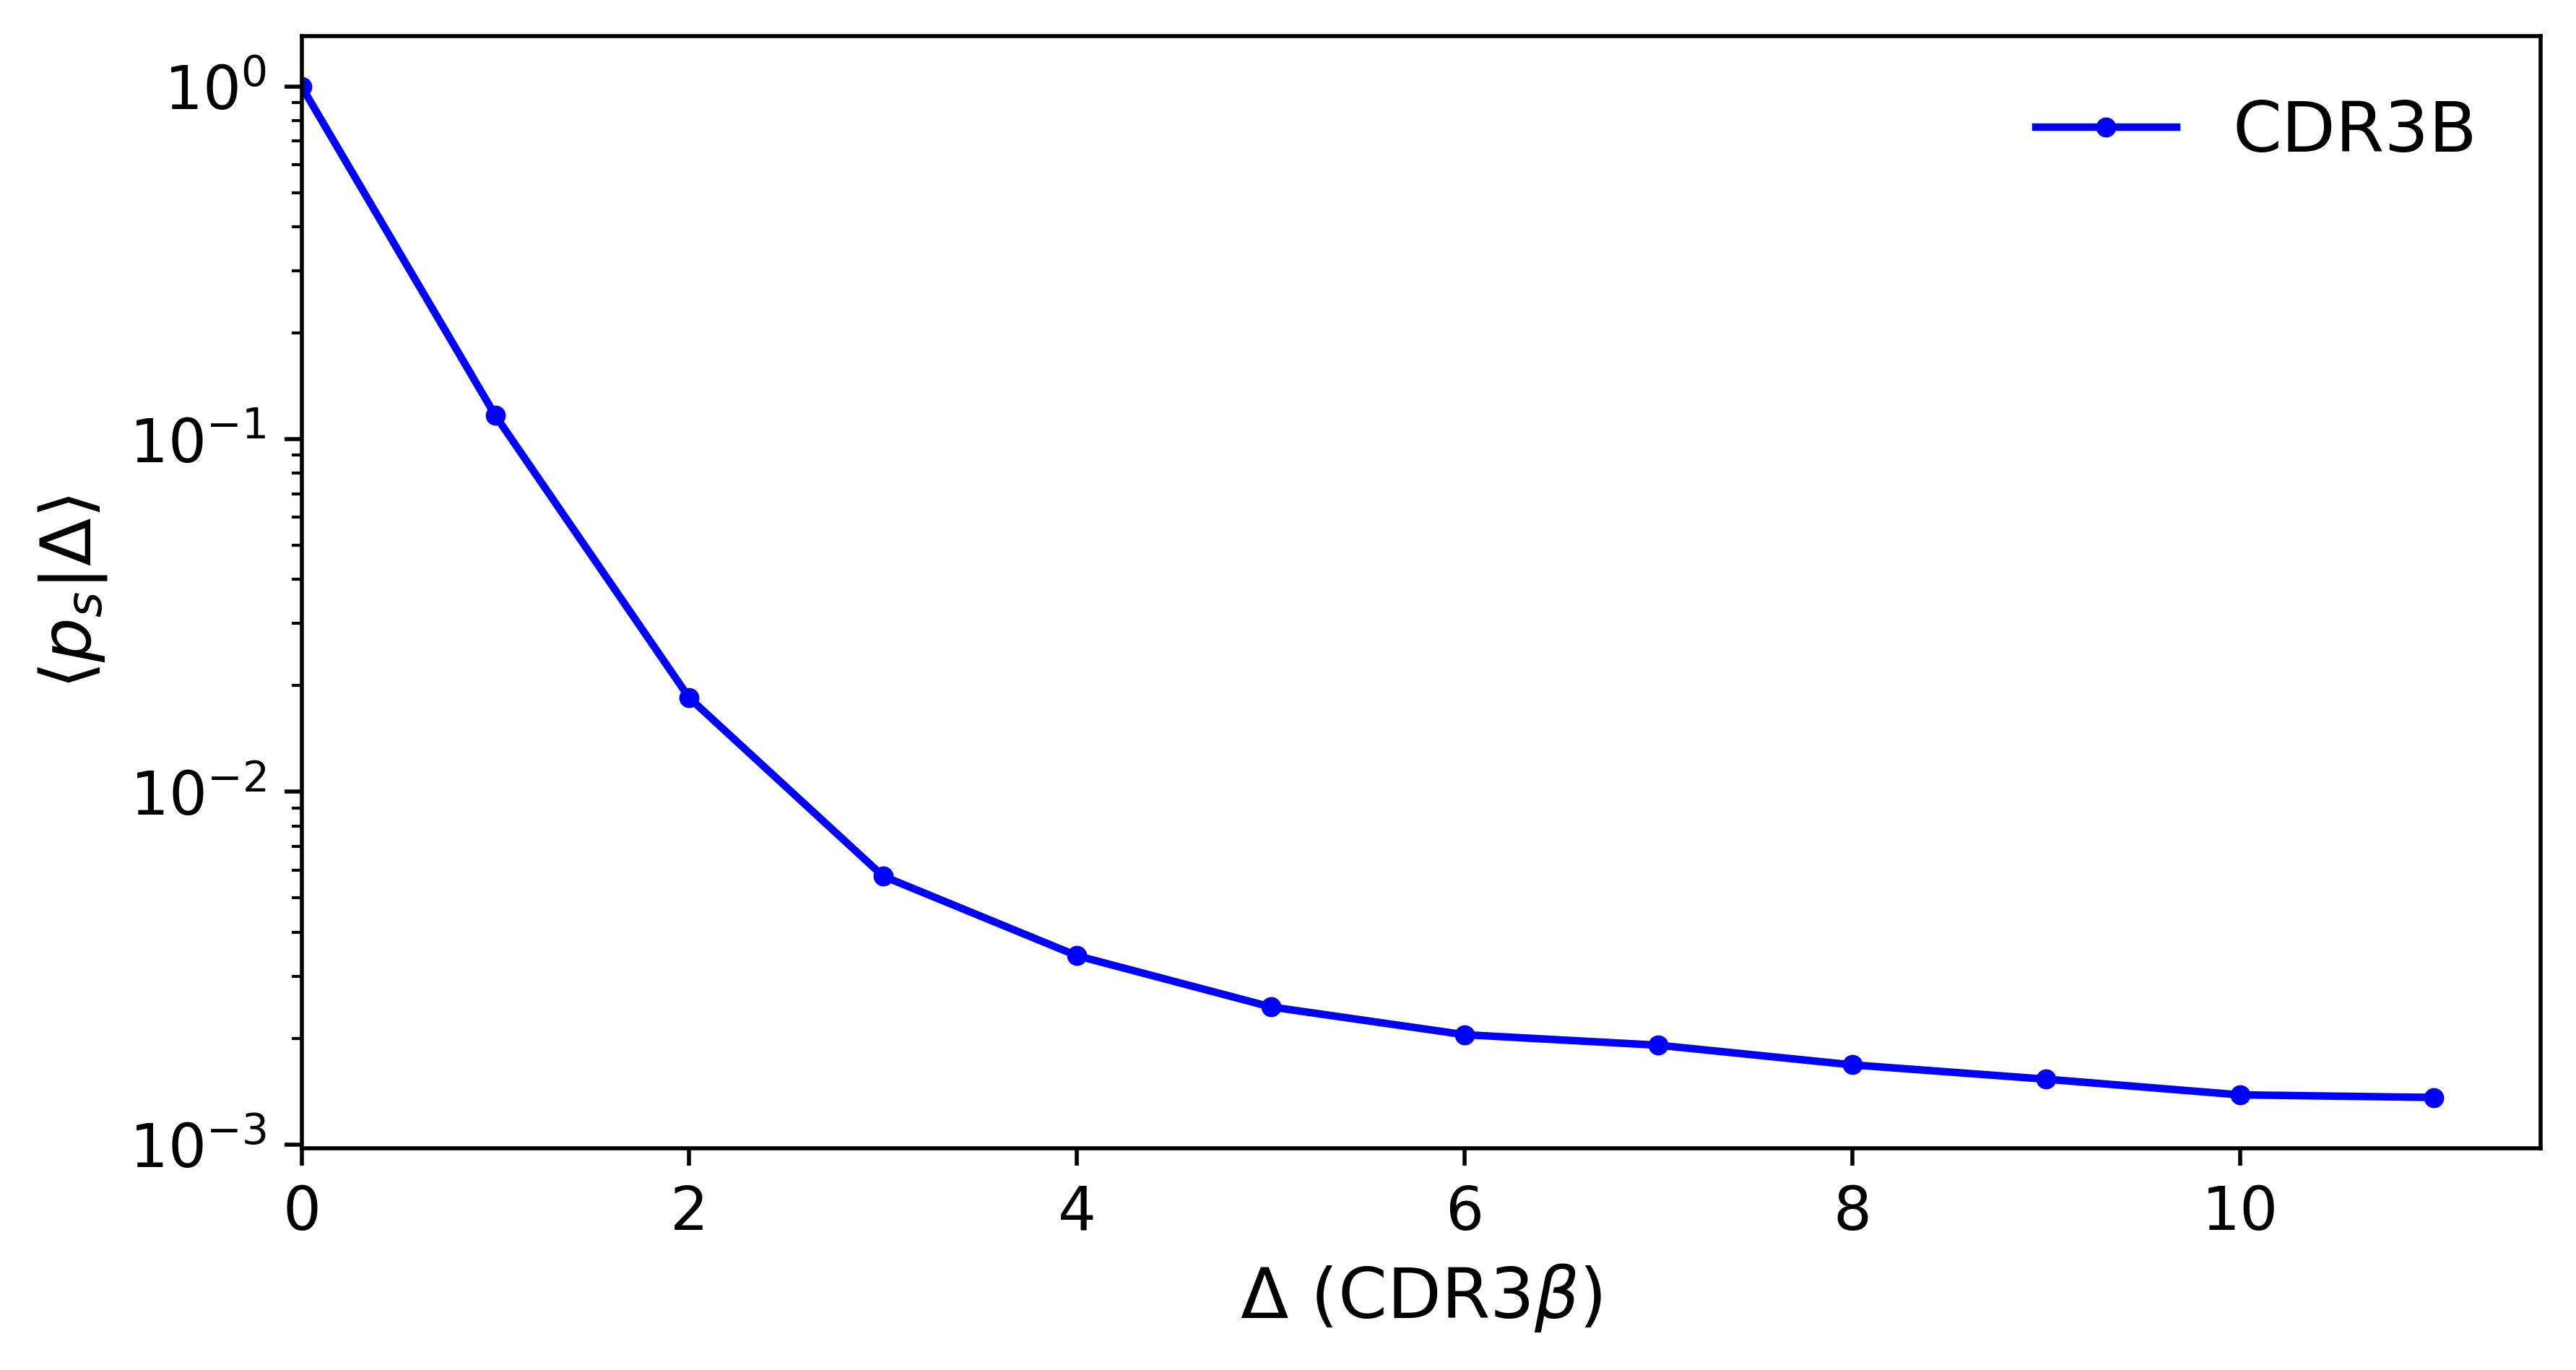

In [29]:
max_delta = 12

fig,ax = plt.subplots(figsize=(8,4))


ax.plot(((pcD_spc/pcD_back))[:max_delta]*((pcD_back/pcD_spc))[0],marker='.',label="CDR3B", color='blue')


ax.set_xlabel(r'$\Delta$ (CDR3$\beta$)')
ax.set_ylabel(r'$\left<p_s | \Delta \right>$')
ax.set_yscale("log")
ax.set_xlim([0,None])
ax.legend();